<center>
    <h1>
        Problemas de mapas
    </h1>
    <h2>
         Análise de algoritmos de busca
    </h2>
    </center>

<h4>
    <center>
        Universidade Federal de Juiz de Fora
        <br/> Departamento de Ciência da Computação
        <br/> DCC014 - Inteligência Artificial, 2020.1
    </center>
</h4>

<h4>
    <ul>
        <li>Wagno Leão Sergio - 201865555C</li>
        <li>Davi Magalhães Pereira - 201865558C</li>
    </ul>
</h4>

#### Professor: Saulo Moraes Villela

## Definição do problema

<font size=3>O problema de mapa consiste em encontrar o menor caminho entre dois pontos de um mapa que é representado por um grafo. Levando em consideração que as rotas que ligam um ponto ao outro possuem custos associados que influenciarão nas escolhas dos algoritmos informados.</font>

## Implementação

<font size=3>
    <ul>
        <li>A linguagem python3 foi escolhida para a implementação do projeto;</li>
        <br>
        <li>Foi criado um gerador de instâncias (mapas) para realizar os experimentos, o mesmo retorna uma lista de tuplas contendo os ID’s dos pontos conectados e o custo da rota, como por exemplo (“A”, “B”, 25.43). Durante a implementação tomou-se o cuidado de tentar gerar mapas consistentes e coerentes, como por exemplo a priorização de conexão entre pontos mais próximos além de especificar a quantidade máxima de vizinhos que cada nó pode ter. Foi adicionado também um ruído ao custo das arestas para garantir a consistência da heurística selecionada;
        </li>
        <img src="./graph_n25.png"/>
        <br>
        <li>
            Foi implementada uma classe <code>Graph()</code> baseada em lista de adjacência onde a expressão <code>Graph[node]</code> retorna uma lista dos vizinhos de ‘node’ e a expressão <code>Graph[node1][node2]</code> retorna peso associado a aresta ‘node1’/‘node2’. A classe tem como principal atributo um dicionário, onde os campos são acessados por <code>NamedTuples</code> que fazem a representação de pontos no mapa. As arestas também são representadas por <code>NamedTuples</code>;
        </li>
        <br>
        <li>
            A classe Graph possui métodos para inserção de nós, inserção de arestas e de impressão do grafo no terminal, além de métodos adicionais para operações com a classe.
        </li>
    </ul>
</font>

<font size=3>Além disso foram criadas funções utilitárias para cálculo de heurística, formatação, registro das métricas executadas e criação de gráficos dos mapas gerados. A distância euclidiana entre os pontos foi escolhida como heurística.<br>Foram utilizadas como métricas: </font>

* Custo e profundidade da solução;
* Número de nós expandidos e visitados;
* Valor médio do fator de ramificação da árvore;
* Tempo de execução do algoritmo.


## Divisão de tarefas

<font size=3>Os dois participantes implementaram a estrutura principal do grafo e as funções utilitárias. Em relação aos algoritmos de busca a divisão de tarefas foi a seguinte:</font>

### Davi

* Busca em largura (BFS)
* Busca em profundidade (DFS)
* Guloso (Greddy)
* A*

### Wagno

* Backtracking
* Busca Ordenada (UCS)
* IDA*

## Execuções
<font size=3>Executamos os algoritmos implementados para mapas gerados com 25, 50, 100 e 200 nós. O número de arestas foi regulado de acordo com o tamanho do mapa. Tomou-se o cuidado de sempre selecionar o par de nós mais distantes entre si do mapa. Cada algoritmo é executado 10 vezes para cada tamanho de mapa, gerando instâncias diferentes.</font>

## Tabela de dados

<font size=3> 
    Para a geração dos dados foi levado em consideração apenas as execuções em que houve sucesso na busca da solução. A tabela gerada possui todas as variáveis mencionadas anteriormente e cada linha representa uma execução.
<font/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
output_df = pd.read_csv("../trabalhoIA/outputs/results.csv")
output_df.head()

,algorithm,solution,depth,cost,expanded_nodes,visited_nodes,average_branching_factor,execution_time,result,n
0,Backtracking,'Yatesfort'->'PortAlexisbury'->'Mcdonaldmouth...,10,237.276,16,17,1.000,0.000159,success,25
1,BFS,'Yatesfort'->'PortAlexisbury'->'NewEthanchest...,5,168.506,24,25,4.375,0.000140,success,25
2,DFS,'Yatesfort'->'Valenzuelaside'->'Tammyfurt'->'...,17,606.053,20,21,4.450,0.000166,success,25
3,UCS,'Yatesfort'->'PortAlexisbury'->'Mcdonaldmouth...,6,165.267,108,25,4.320,0.001406,success,25
4,Greedy,'Yatesfort'->'Valenzuelaside'->'NewEthanchest...,5,208.039,5,6,5.000,0.000171,success,25


<font size=3>
    A tabela abaixo foi criada agrupando as execuções por algoritmo e calculando a média. Observando-a é perceptível que a média do tempo de execução do algoritmo IDA* é de 10 a 20 vezes maior que em relação aos outros algoritmos. Além disso a média de nós expandidos do algoritmo de busca ordenada é 6 vezes maior qu em relação aos demais algoritmos, apesar de ter o menor valor médio de custo.
<font/>

In [63]:
mean_group = output_df.groupby('algorithm').mean().drop(' n', axis=1).reset_index()
mean_group

,algorithm,depth,cost,expanded_nodes,visited_nodes,average_branching_factor,execution_time
0,Astar,10.100,2982.182825,61.550,77.475,2.955097,0.001218
1,BFS,5.725,3904.272800,71.225,84.775,5.271924,0.000958
2,Backtracking,38.950,14905.985825,52.700,53.700,1.000000,0.000951
3,DFS,45.500,16848.481250,94.300,67.450,5.319067,0.001595
4,Greedy,9.575,3982.015750,11.675,11.775,5.870543,0.000285
5,IDAstar,12.775,4536.250700,21.575,38.350,1.000000,0.093574
6,UCS,10.100,2982.182825,592.750,93.550,5.113962,0.006898


In [68]:
mean_group = output_df.groupby('algorithm').mean().reset_index()
mean_group

,algorithm,depth,cost,expanded_nodes,visited_nodes,average_branching_factor,execution_time,n
0,Astar,10.100,2982.182825,61.550,77.475,2.955097,0.001218,93.75
1,BFS,5.725,3904.272800,71.225,84.775,5.271924,0.000958,93.75
2,Backtracking,38.950,14905.985825,52.700,53.700,1.000000,0.000951,93.75
3,DFS,45.500,16848.481250,94.300,67.450,5.319067,0.001595,93.75
4,Greedy,9.575,3982.015750,11.675,11.775,5.870543,0.000285,93.75
5,IDAstar,12.775,4536.250700,21.575,38.350,1.000000,0.093574,93.75
6,UCS,10.100,2982.182825,592.750,93.550,5.113962,0.006898,93.75


<font size=3>
   Na tabela seguinte os dados foram agrupados por algoritmo e número de nós e calculada a média. Ao analisar percebemos que, em um número baixo de nós, os algoritmos não se diferem drasticamente, situação que muda ao aumentarmos o número de nós.
</font>

In [66]:
algo_n_group = output_df.groupby(['algorithm', ' n']).mean().reset_index()
algo_n_group

,algorithm,n,depth,cost,expanded_nodes,visited_nodes,average_branching_factor,execution_time
0,Astar,25,6.1,180.3803,15.1,21.3,2.635655,0.000232
1,Astar,50,7.7,2254.2199,36.5,44.4,1.971687,0.000492
2,Astar,100,10.9,4152.1941,62.4,77.1,2.547154,0.001000
3,Astar,200,15.7,5341.9370,132.2,167.1,4.665894,0.003147
4,BFS,25,4.1,212.9544,17.3,23.1,4.520865,0.000087
5,BFS,50,5.3,2455.5716,33.0,43.7,3.632240,0.000177
6,BFS,100,7.0,5085.6515,73.4,87.8,4.556410,0.000526
7,BFS,200,6.5,7862.9137,161.2,184.5,8.378181,0.003044
8,Backtracking,25,6.9,256.6215,10.4,11.4,1.000000,0.000104
9,Backtracking,50,19.5,4623.3049,30.7,31.7,1.000000,0.000332


## Avaliação dos algoritmos

In [11]:
plt.style.use("bmh")
algo_colors = [
    "#429ae3",
    "#e67a37",
    "#80db7d",
    "#b33434",
    "#694087",
    "#7d5252",
    "#c981b8"
]

<font size=3>
    <p>O gráfico abaixo representa o tempo de execução em segundos em relação ao número de nós do mapa. Como já observamos, o algoritmo IDA* possui a maior média no tempo de execução, tendo um comportamento exponencial. Como o IDA* distorce a escala do primeiro gráfico, foi criado um segundo sem ele para melhor visualização.</p>
    <p>
        No segundo gráfico o algoritmo com maior tempo médio de execução é o de busca ordenada, sendo seguido logo abaixo pelo algoritmo de busca em profundidade. Os demais algoritmos tiveram um tempo de execução menor que 0.005 segundos (5 mílisegundos). É fácil perceber também que o algoritmo guloso obteve o menor tempo médio de execução entre todos os outros.
    </p>
</font>

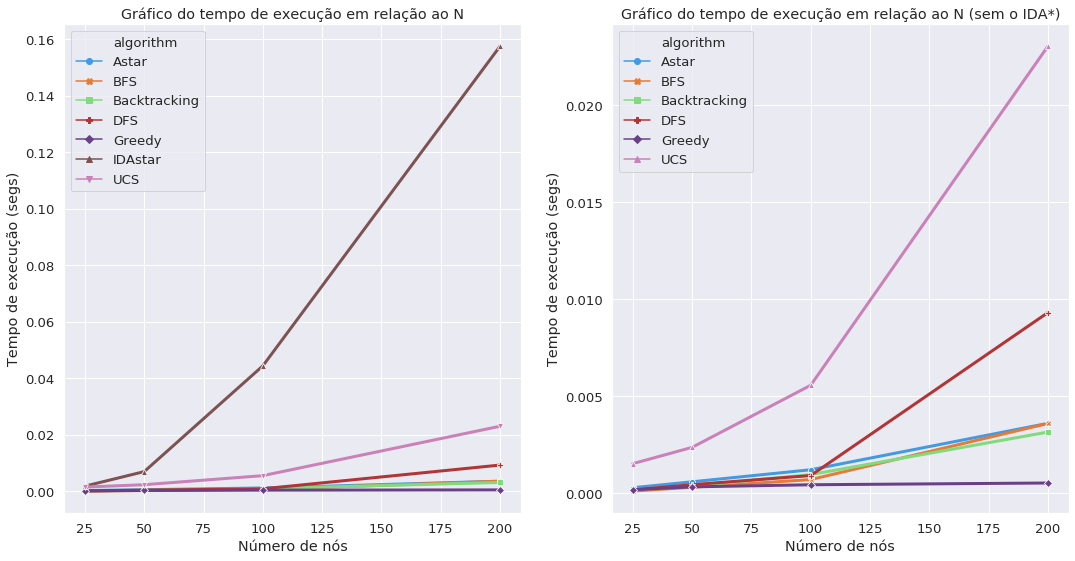

In [57]:
fig, axes = plt.subplots(1,2, figsize=(18, 9), sharex=True)

sns.set(font_scale=1.2)

axes[0].set_title('Gráfico do tempo de execução em relação ao N')

time_plot = sns.lineplot(x = " n", y = ' execution_time', data = algo_n_group, hue = 'algorithm', lw=3, ax=axes[0], palette=algo_colors, style="algorithm", markers=True, dashes=False)

axes[1].set_title('Gráfico do tempo de execução em relação ao N (sem o IDA*)')
time_plot = sns.lineplot(x = " n", y = ' execution_time', data = algo_n_group.query("algorithm != 'IDAstar'"), hue = 'algorithm', lw=3, ax=axes[1], palette=algo_colors[:5] + [algo_colors[6]], style="algorithm", markers=True, dashes=False)

axes[0].set(xlabel="Número de nós", ylabel = "Tempo de execução (segs)")
axes[1].set(xlabel="Número de nós", ylabel = "Tempo de execução (segs)")

fig.savefig('./outputs/time_n_plot.png')

<font size=3>
    <p>
        O gráfico seguinte mostra o custo médio de cada algoritmo em relação ao número de nós. Podemos perceber que tanto o Backtracking quanto a busca em profundidade apresentam comportamento exponinencial enquanto os demais algoritmos apresentam um comportamento logarítmico.
    </p>
</font>

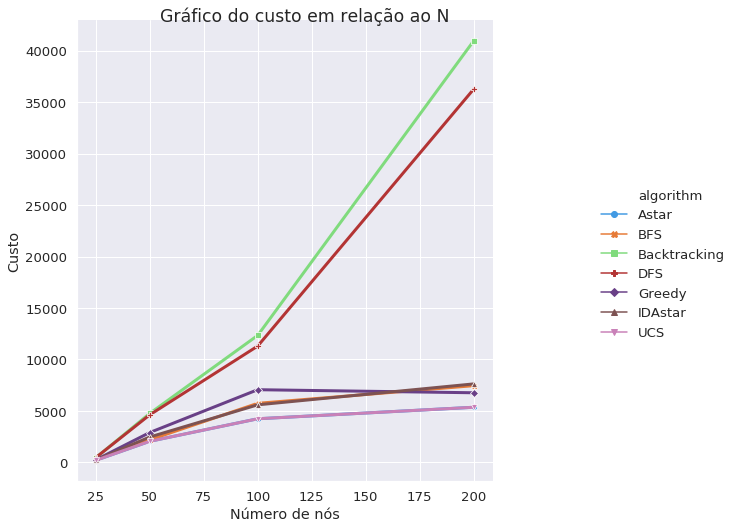

In [59]:
sns.set(font_scale=1.2)
cost_plot = sns.relplot(x = " n", y = ' cost', data = algo_n_group, hue = 'algorithm', kind = "line", lw=3, palette=algo_colors, style="algorithm", markers=True, dashes=False)
cost_plot.set_axis_labels("Número de nós", "Custo")
cost_plot.fig.suptitle('Gráfico do custo em relação ao N')
cost_plot.fig.title_fontsize = 18
cost_plot.fig.set_size_inches((12,8))

cost_plot.savefig('./outputs/cost_n_plot.png')

<font size=3>
    <p>
        Como o algoritmo A* possui um custo médio semelhante ao da busca ordenada, o mesmo é escondido no gráfico. Por esse motivo foi criado um gráfico apenas para o A*, mostrando seu desempenho.
    </p>
</font>

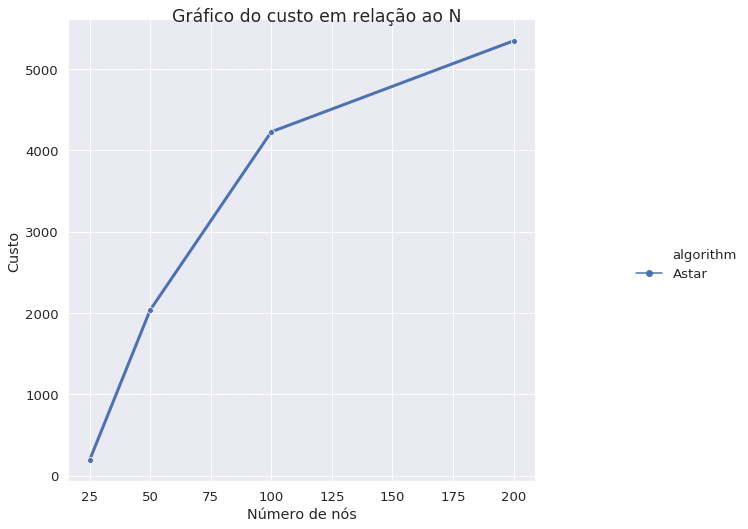

In [60]:
sns.set(font_scale=1.2)
aCost_plot = sns.relplot(
    x = " n",
    y = ' cost',
    data = algo_n_group.query("algorithm == 'Astar'"),
    hue = 'algorithm',
    kind = "line",
    lw=3,
    style="algorithm",
    markers=True,
    dashes=False
)
aCost_plot.set_axis_labels("Número de nós", "Custo")
aCost_plot.fig.suptitle('Gráfico do custo em relação ao N')
aCost_plot.fig.title_fontsize = 18
aCost_plot.fig.set_size_inches((12,8))

aCost_plot.savefig('./aCost_n_plot.png')

[Text(0, 0.5, 'Média de custo associado'), Text(0.5, 0, 'Algoritmo')]

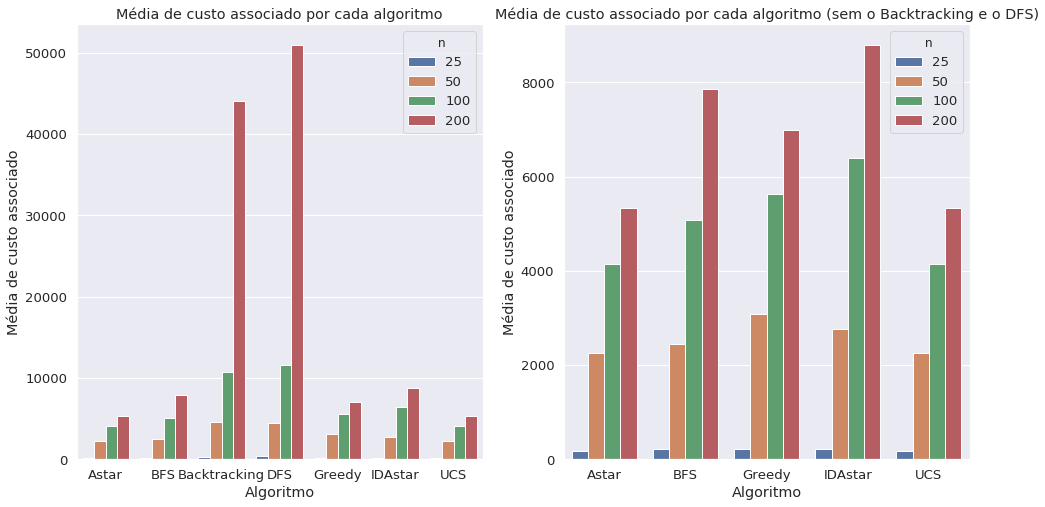

In [82]:
fig, axes = plt.subplots(1,2, figsize=(16, 8))

sns.set(font_scale=1.2)
cost_bar = sns.barplot(x = "algorithm", y = ' cost', hue=' n', data = algo_n_group, ax=axes[0])
cost_bar.set_title("Média de custo associado por cada algoritmo")

cost_bar = sns.barplot(x = "algorithm", y = ' cost', hue=' n', data = algo_n_group.query("algorithm != 'Backtracking' and algorithm != 'DFS'"), ax=axes[1])
cost_bar.set_title("Média de custo associado por cada algoritmo (sem o Backtracking e o DFS)")

axes[0].set(xlabel="Algoritmo", ylabel = "Média de custo associado")
axes[1].set(xlabel="Algoritmo", ylabel = "Média de custo associado")

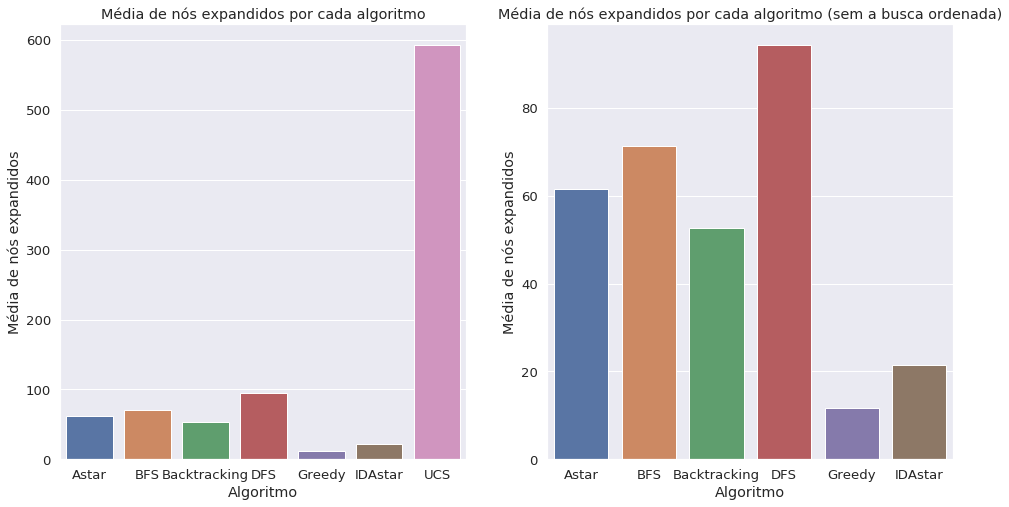

In [65]:
fig, axes = plt.subplots(1,2, figsize=(16, 8))

sns.set(font_scale=1.2)
expd_nodes = sns.barplot(x = "algorithm", y = ' expanded_nodes', data = mean_group, ax=axes[0])
expd_nodes.set_title("Média de nós expandidos por cada algoritmo")

expd_nodes = sns.barplot(x = "algorithm", y = ' expanded_nodes', data = mean_group.query("algorithm != 'UCS'"), ax=axes[1])
expd_nodes.set_title("Média de nós expandidos por cada algoritmo (sem a busca ordenada)")

axes[0].set(xlabel="Algoritmo", ylabel = "Média de nós expandidos")
axes[1].set(xlabel="Algoritmo", ylabel = "Média de nós expandidos")

fig.savefig('./outputs/expanded_algo_plot.png')

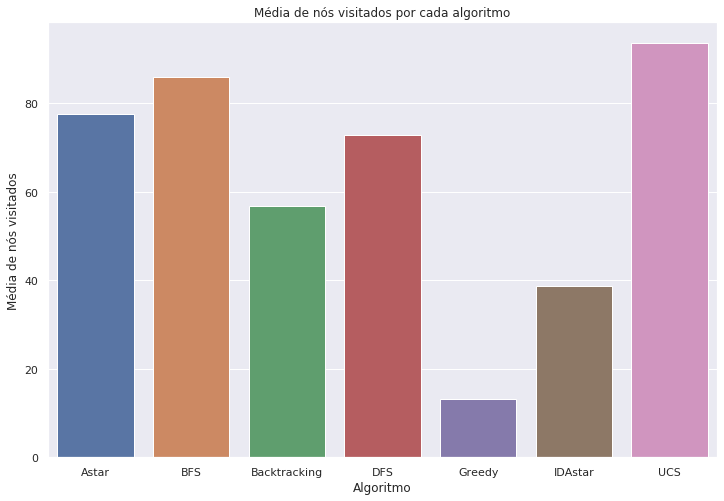

In [41]:
fig = plt.figure()

sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,8)})
visit_nodes = sns.barplot(x = "algorithm", y = ' visited_nodes', data = mean_group)
visit_nodes.set_title("Média de nós visitados por cada algoritmo")

visit_nodes.set(xlabel="Algoritmo", ylabel = "Média de nós visitados")

fig.savefig('./outputs/visited_n_plot.png')

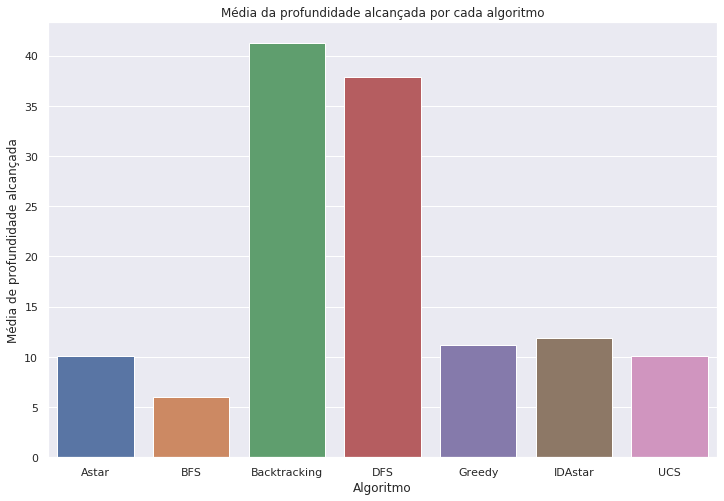

In [43]:
fig = plt.figure()

sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,8)})
depth_mean = sns.barplot(x = "algorithm", y = ' depth', data = mean_group)
depth_mean.set_title("Média da profundidade alcançada por cada algoritmo")

depth_mean.set(xlabel="Algoritmo", ylabel = "Média de profundidade alcançada")

fig.savefig('./outputs/depth_algo_plot.png')

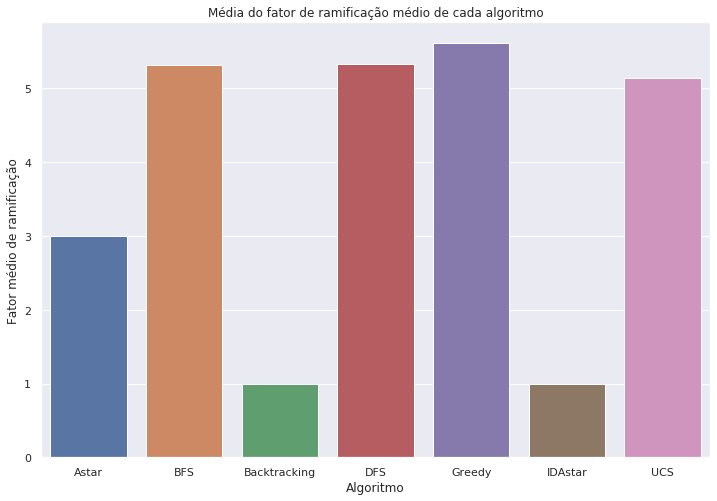

In [44]:
fig = plt.figure()

sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,8)})
avgBrch_mean = sns.barplot(x = "algorithm", y = ' average_branching_factor', data = mean_group)
avgBrch_mean.set_title("Média do fator de ramificação médio de cada algoritmo")
avgBrch_mean.set(xlabel="Algoritmo", ylabel = "Fator médio de ramificação")

fig.savefig('./outputs/avgBranch_algo_plot.png')

In [46]:
cost_matrix = algo_n_group[['algorithm', ' n', ' cost']]
cost_matrix = cost_matrix.pivot(index='algorithm', columns=' n', values= ' cost')

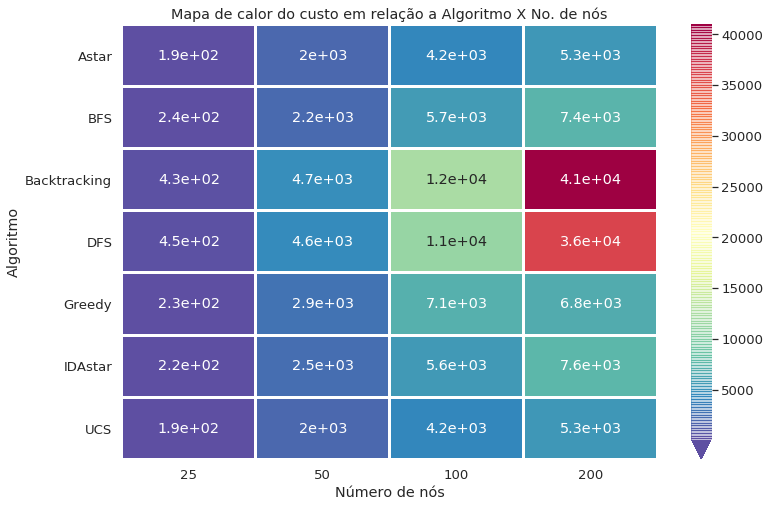

In [99]:
fig = plt.figure(figsize=(12,8))

cbar_kws = {
            "shrink":1,
            'extend':'min', 
            "drawedges":True,
           }

heat_map = sns.heatmap(cost_matrix, cmap='Spectral_r', linewidths=2, cbar_kws=cbar_kws, annot=True)

plt.title("Mapa de calor do custo em relação a Algoritmo X No. de nós")
heat_map.set(xlabel="Número de nós", ylabel = "Algoritmo")

fig.savefig('./outputs/heatmap.png')

## Conclusão